In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))

In [3]:
%timeit my_arr2 = my_arr * 2

759 μs ± 59 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [4]:
%timeit my_list2 = [x * 2 for x in my_list]

40.2 ms ± 810 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


- numpy is 10 to 100 times faster than pure python

# 4.1 The Numpy ndarray: A Multidimensional Array Object

In [5]:
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [6]:
# easy element-wise operations, similar to scalar computations
data * 10

array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])

In [7]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

In [9]:
# ndarray generally contains homogeneous data
data.shape, data.dtype

((2, 3), dtype('float64'))

- `ndarray` is the standard array object in `numpy`
- every `ndarray` has an attribute `shape` and `dtype` to check its shape and content type

## Creating ndarrays

In [10]:
# easiest way to create an array
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [11]:
# nested sequences work, too
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [12]:
arr2.ndim, arr2.shape

(2, (2, 4))

In [13]:
# ndarray automatically tries to infer a good type
arr1.dtype, arr2.dtype

(dtype('float64'), dtype('int64'))

In [14]:
# there are built-in functions to create numpy arrays, as well
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [16]:
np.ones(1)

array([1.])

In [17]:
np.empty((2, 3, 2))

array([[[          nan,  1.61886e-319],
        [          nan,  3.23781e-319],
        [-0.00000e+000,  8.09477e-320]],

       [[-0.00000e+000,  8.06315e-320],
        [-0.00000e+000,  4.94066e-324],
        [ 4.94066e-324,  0.00000e+000]]])

In [18]:
# similar to range()
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [20]:
arr_like = np.full_like(arr1, fill_value=1)
arr_like

array([1., 1., 1., 1., 1.])

In [21]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [22]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

- several ways of creating `ndarrays` exist
- using `np.array(x)`, where `x` is e.g. a list (or list of lists) is one option
- numpy tries to infer a good data type
- `np.zeros` is a method that creates an array with all 0s
- `np.ones` and `np.empty` exists as well
- and several more: `np.eye`/`np.identity`, `np.full_like`, `np.zeros_like`...

## Data Types for ndarrays

In [23]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype, arr2.dtype

(dtype('float64'), dtype('int32'))

In [24]:
# can explicitly cast data type
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [26]:
float_arr = arr.astype(np.float64)
float_arr, float_arr.dtype

(array([1., 2., 3., 4., 5.]), dtype('float64'))

In [27]:
# floating point numbers get truncated when converting to int
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [30]:
# we can convert numeric strings to numbers as well
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.bytes_)
numeric_strings.astype(np.float64)

array([ 1.25, -9.6 , 42.  ])

In [31]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [32]:
zeros_uint32 = np.zeros(8, dtype="u4")
zeros_uint32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

- the `dtype` attribute is a special object containing information about the metadata of the ndarray
- many data types exist
- the `arr.astype()` function can be used to cast between data types

## Arithmetic with Numpy Arrays

In [33]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [34]:
# arrays allow batch-like computations without using for loops
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [35]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [36]:
# scalars are propagated to each element (element-wise calculations)
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [37]:
arr ** 2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [38]:
# any comparisons with an array of the same size yield Boolean arrays
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

- operations between arrays with the same dimensions work element-wise
- when using a scalar, the same thing is true
- comparisons between arrays of the same size returns Boolean arrays

## Basic Indexing and Slicing

In [39]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
# basic indexing works the same as with pure python
arr[5], arr[5:8], arr

(np.int64(5), array([5, 6, 7]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [42]:
# we can also assign while slicing
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [43]:
# mind also that array slices are views
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [44]:
arr_slice[1] = 123456
arr

array([     0,      1,      2,      3,      4,     12, 123456,     12,
            8,      9])

In [45]:
# bare slice assigns to all values in an array
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [46]:
# more-dimensional arrays behave the same, but the indexing/slicing returns arrays again
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [ ]:
# both options work to select a specific value
# the first one is recursive
arr2d[0][2], arr2d[0, 2]

In [47]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [48]:
# in multidimensional arrays, if you omit lower-level axis indices, you get an array
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [49]:
# we can now assign both scalar values or arrays
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [50]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [51]:
# return all indices that start with (1, 0)
arr3d[1, 0]

array([7, 8, 9])

In [52]:
x = arr3d[1]
x, x[0]

(array([[ 7,  8,  9],
        [10, 11, 12]]),
 array([7, 8, 9]))

In [53]:
# slicing 1D arrays is similar to slicing python lists
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [54]:
# on more-dimensional arrays, we slice per index level
arr2d[:2]   # slice first two rows

array([[1, 2, 3],
       [4, 5, 6]])

In [55]:
arr2d[:2, 1:]   # slice first two rows and then from the first element on

array([[2, 3],
       [5, 6]])

In [56]:
# the output, again, is always a view
# and integer indexes and slices can be combined too!
lower_dim_slice = arr2d[1, :2]
lower_dim_slice.shape

(2,)

In [57]:
# similar outcome on the third column
arr2d[:2, 2]

array([3, 6])

In [58]:
# a colon by itself means taking the whole slice
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [60]:
# assigning to a slice assigns to the whole selection
arr2d[:2, :1] = 0
arr2d

array([[0, 2, 3],
       [0, 5, 6],
       [7, 8, 9]])

- indexing works similar to standard python lists, e.g. `arr[5]`, `arr[1:3]`
- slices are always views: updating them updates the values in the true array
- `[:]` returns all values in an array
- on more-dimensional arrays, two types of indexing can be used:
    - recursive: `arr[0][1]`
    - comma-separated: `arr[0, 1]`
- when specifying only one index, an array is returned
- arrays can be indexing with slices, too

## Boolean Indexing

In [61]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [62]:
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2], [-12, -4], [3, 4]])
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [63]:
data[names == "Bob"]

array([[4, 7],
       [0, 0]])

In [64]:
data[names == "Bob", 1:]

array([[7],
       [0]])

In [65]:
data[names == "Bob", 1]

array([7, 0])

In [66]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [67]:
~(names == "Bob")

array([False,  True,  True, False,  True,  True,  True])

In [68]:
# select everything but bob
data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [69]:
# we can also create a variable from this
cond = names == "Bob"
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [70]:
# we can combine boolean masks using operators
mask = (names == "Bob") | (names == "Will")
mask, type(mask)

(array([ True, False,  True,  True,  True, False, False]), numpy.ndarray)

In [71]:
data[mask]

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

In [72]:
# we can also set values
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

In [73]:
# or set whole rows/columns when using 1d Boolean arrays
data[names != "Joe"] = 7
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

- Boolean indexing refers to selecting array objects using Boolean masks, e.g.:
    - `data[other_data == "Value"]`
    - `data[other_data != "Value"]`
    - `data[~(other_data == "Value")]`
    - `data[data < 0]`
- This can again be combined with other slices/indexes when working with more-dimensional arrays
- Several boolean masks can be combined with `|` or `&`: `mask = (data == "1") | (data == "2") & (data != "3)`

## Fancy Indexing

In [74]:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [75]:
# fancy indexing refers to indexing using integer arrays
arr[[4, 3, 0, 6]] # this returns the rows in this order

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [76]:
# negative indices work from the back
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [77]:
# passing multiple index arrays selects a one-dimensional array of elements corresponding to each tuple of indices
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [79]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [80]:
# if the two lists do not have the same dimensions, an error is thrown!
arr[[1, 5, 7, 2], [0, 3, 1]]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (4,) (3,) 

In [84]:
# fancy indexing always updates the values
arr[[1, 3, 4], [3, 2, 2]] = 1000
arr

array([[   0,    1,    2,    3],
       [   4,    5,    6, 1000],
       [   8,    9,   10,   11],
       [  12,   13, 1000,   15],
       [  16,   17, 1000,   19],
       [  20,   21,   22,   23],
       [  24,   25,   26,   27],
       [  28,   29,   30,   31]])

- fancy indexing refers to selecting values with lists
- the output is a new array with the elements in the order of indexing
- when passing multiple lists, they act like tuples

## Transposing Arrays and Swapping Axes

In [85]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [86]:
# special attribute for transposition
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [87]:
# comes in handy when doing matrix multiplications
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [88]:
np.dot(arr.T, arr)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [89]:
arr.T @ arr

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [90]:
# .T is a special case of swapping axes, which is also a method
# which again returns a view on the data, not a copy
arr.swapaxes(0, 1)

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

- every array has a special attribute `.T`, which transposes the object
- `np.dot(arr.T, arr2)` and `arr.T @ arr2` multiply two arrays
- `arr.swapaxes(0, 1)` can be used to transpose arrays, as well

# 4.2 Pseudorandom Number Generation

In [91]:
# np.random contains functions to generating arrays with random numbers from all kinds of distributions
samples = np.random.standard_normal(size=(4, 4))
samples

array([[ 0.46495944,  2.0740347 ,  0.54683044, -1.09003129],
       [ 0.74142301, -2.32614396,  0.87626136,  2.51268043],
       [-0.00739959, -1.26818002,  1.69263194,  0.66010871],
       [ 1.00440198, -1.47464088, -0.01304594,  0.43103032]])

In [92]:
# this module is a lot faster than python's built-in functionality
from random import normalvariate

n = 1_000_000
print(normalvariate(0, 1))
%timeit [normalvariate(0, 1) for _ in range(n)]

518 ms ± 93.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [93]:
%timeit np.random.standard_normal(n)

21.7 ms ± 4.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [94]:
# the numbers are not truly random
# all functions use a default random number generator, but an explicit one can be used, too
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))

In [95]:
type(rng)

numpy.random._generator.Generator

- numpy has a module for random number generation
- the module has many functions to create pseudorandom values
- `permutation`: create a random permutation of a sequence
- `shuffle`: randomly permute in place
- `uniform`: draw from a uniform distribution
- `standard_normal`: draw from a standard normal distribution
- `integers`: draw random integers from a given low-to-high range
- and many more

# 4.3 Universal Functions: Fast Element-Wise Array Functions

In [96]:
# universal functions, or ufuncs, are functions that perform element-wise operations on data in ndarrays
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [99]:
# some examples work on a single array
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [98]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [100]:
# others work on two
x = rng.standard_normal(8)
y = rng.standard_normal(8)

np.maximum(x, y)

array([-0.46695317,  0.6488928 ,  0.78884434, -1.25666813,  2.34740965,
        1.39897899,  1.32229806,  0.90219827])

In [101]:
# an ufunc can also return multiple arrays
arr = rng.standard_normal(7) * 5
remainder, whole_part = np.modf(arr)
remainder, whole_part

array([ 4.51459671, -8.10791367, -0.7909463 ,  2.24741966, -6.71800536,
       -0.40843795,  8.62369966])

In [103]:
# each ufunc has an optional out-parameter that can be used to assign the output to another array
out = np.zeros_like(arr)
np.add(arr, 1)

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

In [105]:
np.add(arr, 1, out=out)
out

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

- an ufunc is a universal function that operates on each element in an array or across two arrays
- each ufunc has an optional `out` parameter that can be used to store the output into an existing array
- many examples exist:
- `modf()` returns the fractional and integral part of a floating point array
- `sqrt()`, `exp()`, `square()` or `log()`
- `maximium()`, `minimum()`
- `abs()`, `fabs()`
- and many more

# 4.4 Array-Oriented Programming with Arrays

Vectorization is the process of converting for loops into array-oriented expressions. In general, they will be significantly faster like this.

In [107]:
points = np.arange(-5, 5, 0.01)

# np.meshgrid returns two two-dimensional matrices corresponding to all x, y combinations
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]],
      shape=(1000, 1000))

In [108]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]], shape=(1000, 1000))

Text(0.5, 1.0, 'Image plot')

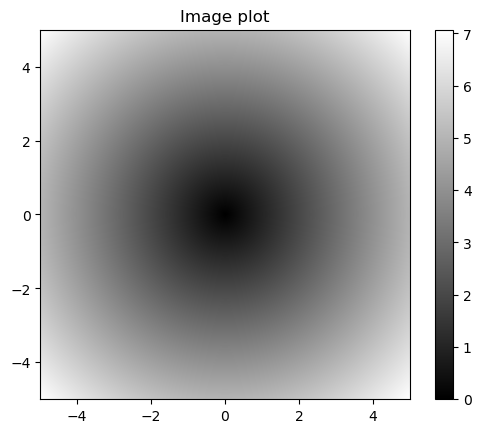

In [111]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray, extent=(-5., 5., -5., 5.))
plt.colorbar()
plt.title("Image plot")

- numpy has many useful tools to vectorize operations

## Expressing Conditional Logic as Array Operations

In [112]:
# np.where is a vectorized version of the ternary operator
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

In [114]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[np.float64(1.1),
 np.float64(2.2),
 np.float64(1.3),
 np.float64(1.4),
 np.float64(2.5)]

In [115]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [116]:
# the second or third arguments could be scalars, too
arr = rng.standard_normal((4, 4))
arr

array([[ 2.61815943,  0.77736134,  0.8286332 , -0.95898831],
       [-1.20938829, -1.41229201,  0.54154683,  0.7519394 ],
       [-0.65876032, -1.22867499,  0.25755777,  0.31290292],
       [-0.13081169,  1.26998312, -0.09296246, -0.06615089]])

In [117]:
arr > 0

array([[ True,  True,  True, False],
       [False, False,  True,  True],
       [False, False,  True,  True],
       [False,  True, False, False]])

In [118]:
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2, -2],
       [-2, -2,  2,  2],
       [-2, -2,  2,  2],
       [-2,  2, -2, -2]])

In [119]:
# w can also combine scalars and arrays
np.where(arr > 0, 2, arr)

array([[ 2.        ,  2.        ,  2.        , -0.95898831],
       [-1.20938829, -1.41229201,  2.        ,  2.        ],
       [-0.65876032, -1.22867499,  2.        ,  2.        ],
       [-0.13081169,  2.        , -0.09296246, -0.06615089]])

- the ternary operator is contained in the method `np.where(cond, arr1, arr2)`

## Mathematical and Statistical Methods

In [120]:
# there are several methods available to compute statistics for the array along an axis
arr = rng.standard_normal((5, 4))
arr.mean()

np.float64(-0.08719744457434529)

In [121]:
arr.sum()

np.float64(-1.743948891486906)

In [123]:
# the same functions are also available with top-level declarations
np.sum(arr)

np.float64(-1.743948891486906)

In [124]:
# as mentioned, the functions can be called along an axis, too
arr.mean(axis=1)    # across columns

array([ 0.10899104,  0.3280763 ,  0.16502112, -0.66719934, -0.37087634])

In [125]:
# across rows
arr.mean(axis=0)

array([-0.32584615,  0.20798129, -0.06687266, -0.16405226])

In [127]:
# cumsum() computes the cumulative sum
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [128]:
# with multidimensional arrays, cumsum returns an array fo the same size, but with the partial aggregates along an indicated axis
arr = np.arange(9).reshape((3, 3))
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [130]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [131]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

In [132]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36])

- there are several functions to compute statistics
- e.g. `mean()` or `sum()`
- these functions are available as class methods
- in this case, they work in place
- each function also exists with a top-level declarator, in which case they return the output
- on multidimensional arrays, the methods take in an `axis` parameter along which to compute the statistic
- `axis=1` means the computation is conducted along the columns (so the columns are reduced to one)
- `axis=0` means the computation is conducted along the rows (so rows are reduced to one)
- some methods also return arrays instead of scalars

## Methods for Boolean Arrays

In [134]:
# count number of True/False
arr = rng.standard_normal(100)
(arr > 0).sum() # Number of positive values

np.int64(55)

In [135]:
# any and all are useful as well
bools = np.array([False, False, True, False])
bools.any() # True if any is True

np.True_

In [136]:
bools.all() # True if all are True

np.False_

- the `sum()` method can be used to count True/False values
- the `any()` method returns true if any value is true
- the `all()` method returns true if all values are true

## Sorting

In [137]:
arr = rng.standard_normal(6)
arr

array([-0.03425814, -0.3551683 , -0.37842837,  0.19064869,  0.48439629,
        1.23026775])

In [138]:
# there are built-in functions for sorting arrays
arr.sort()

In [139]:
# multi-dim arrays can be sorted along an axis
arr = rng.standard_normal((5, 3))
arr

array([[ 0.83297062, -0.56494175,  1.41469601],
       [ 1.24828122, -1.5589481 ,  0.66523259],
       [ 0.82559517,  0.96631883,  0.5471753 ],
       [-1.29718326, -0.26763433, -2.07020656],
       [-0.15789255,  2.02894262,  0.68157089]])

In [142]:
# the functions work inplace!
arr.sort(axis=0)
arr

array([[-1.29718326, -1.5589481 , -2.07020656],
       [-0.15789255, -0.56494175,  0.5471753 ],
       [ 0.82559517, -0.26763433,  0.66523259],
       [ 0.83297062,  0.96631883,  0.68157089],
       [ 1.24828122,  2.02894262,  1.41469601]])

In [143]:
arr.sort(axis=1)
arr

array([[-2.07020656, -1.5589481 , -1.29718326],
       [-0.56494175, -0.15789255,  0.5471753 ],
       [-0.26763433,  0.66523259,  0.82559517],
       [ 0.68157089,  0.83297062,  0.96631883],
       [ 1.24828122,  1.41469601,  2.02894262]])

In [144]:
# there is also a top-level method
# it returns its output, though
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)
sorted_arr2

array([-10,  -3,   0,   1,   5,   7])

- there are built in methods for sorting arrays
- e.g. the `arr.sort()` method, it works inplace
- with multidimensional arrays, again an axis parameter can be passed
- the top level declarator can be used, too (`np.sort(arr)`)

## Unique and Other Set Logic

In [147]:
# there are some set functions, as well
# get unique values in an array
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [148]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [149]:
# same in python
sorted(set(names))

[np.str_('Bob'), np.str_('Joe'), np.str_('Will')]

- there are many methods for set operations
- the most basic one, `np.unique(arr)` returns the unique values, essentially returning a set of the array

# 4.5 File Input and Output with Arrays

Numpy provides built-in methods for saving and loading data to and from disk

In [151]:
arr = np.arange(10)
np.save("some_array", arr)  # numpy automatically adds the extension ".npy"

In [152]:
# to load back
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [153]:
# multiple arrays can be saved at the same time using savez
np.savez("array_archive.npz", a=arr, b=arr)
arch = np.load("array_archive.npz")
arch["b"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [154]:
# numpy also has methods that compress the data along the way
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

- use `np.save(file_name, arr)` to save an array
- `np.load(file_name)` loads it back
- `np.savez(file_name, key1=arr1, key2=arr2...)` saves multiple arrays at the same time
- loading it back, the individual arrays can be accessed using dictionary-like syntax
- `np.savez_compressed(file_name, key1=arr1, key2=arr2)` provides built-in compression

# 4.6 Linear Algebra

In [155]:
# there are many built-in functions for linear algebra calculations
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

# such as matrix multiplication
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [156]:
# which is the same as
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [157]:
# and
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

In [158]:
# numpy.linalg has many matrix decompositions and other linear algebra operations
from numpy.linalg import inv

x = rng.standard_normal((5, 5))
mat = x.T @ x
mat @ inv(mat)

array([[ 1.00000000e+00,  3.25395334e-13,  6.10825470e-14,
         9.28198624e-14, -2.26313126e-14],
       [ 9.21722265e-14,  1.00000000e+00,  8.78046254e-15,
        -3.99706109e-14, -6.70909455e-15],
       [ 9.50496203e-14,  6.92180809e-14,  1.00000000e+00,
         4.30468479e-14,  7.15778972e-15],
       [ 2.16311827e-13, -1.73843191e-14, -3.99498684e-15,
         1.00000000e+00,  3.57324807e-14],
       [-2.46361405e-14,  2.85627098e-13,  5.36787331e-14,
         6.22092861e-14,  1.00000000e+00]])

- numpy has many built in operations for linear algebra calculations
- such as `np.dot(x, y)` to compute matrix multiplications
- the submodule `numpy.linalg` contains many more operations, such as:
- `inv()`: Compute inverse
- `diag()`: Return the diagonal elements of a square matrix
- `trace()`: Compute sum of diagonal elements
- `det()`: Compute determinant
- `lstsq()` Compute least squares solution
- `solve()` Solve for `x`
- and many more

# 4.7 Example: Random Walks

In [159]:
# simple random walk starting at 0 with steps 1 and -1 occuring with equal probability
import random

position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else - 1
    position += step
    walk.append(position)

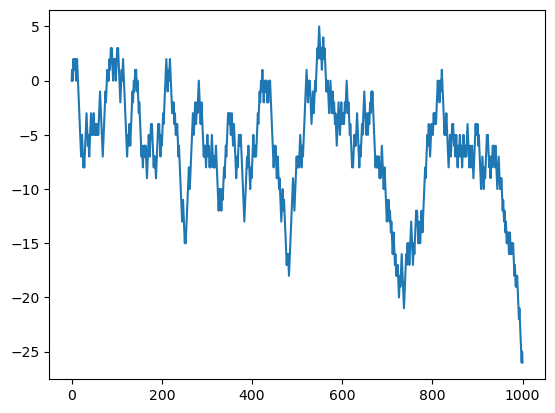

In [160]:
plt.plot(walk)

In [161]:
# this is very much the same as computing the cumulative sum
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

In [162]:
walk.min()

np.int64(-8)

In [163]:
walk.max()

np.int64(50)

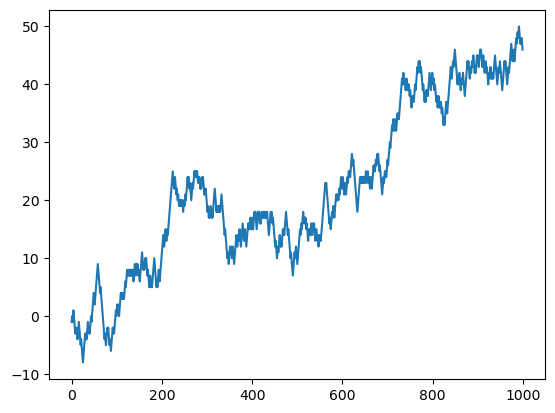

In [164]:
plt.plot(walk)

In [165]:
# let's say we want the index of the first time crossing some specific value
(np.abs(walk) >= 10).argmax()

np.int64(155)

## Simulating Many Random Walks at Once

In [166]:
nwalks = 5000
nsteps = 1000

# simulating this many times is not much more complicated
draws = rng.integers(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]], shape=(5000, 1000))

In [167]:
walks.max()

np.int64(114)

In [168]:
walks.min()

np.int64(-120)

In [170]:
# let's check the minimum crossing time for some value
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30.sum()    # number of times we have hit 30 and -30

np.int64(3395)

In [171]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([201, 491, 283, ..., 219, 259, 541], shape=(3395,))

In [172]:
crossing_times.mean()

np.float64(500.5699558173785)